In [10]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [11]:
def cluster_creation(lat,gr,ne,T):
    k=gr.copy()
    cl=[]
    tr=1-np.exp(-2./T)
    for i,gi in enumerate(gr):
        
        if (gi in k) and i!=0:
            cl.append(l.copy())
            l.clear()
            l.append(gi)
            k.remove(gi)
            
        if (gi in k) and i==0:
            l=[]
            l.append(gi)
            k.remove(gi)
            
        for n in ne[i]:
            tri=np.random.uniform(0,1)
            
            if lat[n]==lat[gi]:
                if n in k: 
                    if tri<tr:
                        l.append(n)
                        k.remove(n)
            
    #Add the last one        
    cl.append(l)
    return cl

In [12]:
L=20
lat=2*np.random.randint(2,size=(L,L))-1
G=nx.grid_2d_graph(L,L,periodic=True)
gr=list(G.nodes())
ne=[]
for g in gr:
    ne.append(list(G.neighbors(g)))

In [13]:
cl=cluster_creation(lat.copy(),gr,ne,2)
gl=cluster_creation(lat.copy(),gr,ne,2)
for c,g in zip(cl,gl):
    print(c,g)

[(0, 0), (0, 1), (0, 19)] [(0, 0), (1, 0), (0, 1), (0, 19), (0, 2), (1, 2), (0, 3), (0, 4), (19, 4)]
[(0, 2), (0, 3), (19, 3)] [(0, 5)]
[(0, 4), (19, 4)] [(0, 6), (1, 6), (0, 7), (1, 7), (0, 8), (19, 8)]
[(0, 5)] [(0, 9), (0, 10)]
[(0, 6), (1, 6), (0, 7), (1, 7), (0, 8), (19, 8)] [(0, 11), (0, 12), (1, 12)]
[(0, 9), (0, 10)] [(0, 13), (19, 13)]
[(0, 11), (0, 12)] [(0, 14), (1, 14)]
[(0, 13), (0, 14), (1, 14)] [(0, 15), (0, 16)]
[(0, 15), (1, 15)] [(0, 17), (1, 17), (19, 17)]
[(0, 16)] [(0, 18), (1, 18)]
[(0, 17), (19, 17)] [(1, 1)]
[(0, 18), (1, 18)] [(1, 3), (2, 3)]
[(1, 0), (2, 0)] [(1, 4), (1, 5), (2, 6)]
[(1, 1), (1, 2)] [(1, 8)]
[(1, 3)] [(1, 9), (2, 9)]
[(1, 4)] [(1, 10)]
[(1, 5), (2, 6)] [(1, 11), (1, 13)]
[(1, 8), (2, 8)] [(1, 15)]
[(1, 9), (2, 9), (1, 10)] [(1, 16), (2, 16), (2, 17)]
[(1, 11)] [(1, 19)]
[(1, 12), (1, 13)] [(2, 0), (3, 0)]
[(1, 16), (1, 17), (2, 18)] [(2, 1)]
[(1, 19), (3, 0), (2, 19)] [(2, 2), (3, 3)]
[(2, 1)] [(2, 4), (2, 5), (3, 5)]
[(2, 2), (2, 3), (3, 3)] 

In [14]:
#energy definition
#takes a list of the sites for wich you want to evaluate the energy

def en(lat,gr,ne):
    k=gr.copy()
    e=0.
    for i,gi in enumerate(gr):
        for n in ne[i]:
            if n in k:
                e-=lat[gi]*lat[n]
        k.remove(gi) #avoid counting twice
    return(e)

In [15]:
#It is the same of the energy evaluated by hand

lat=2*np.random.randint(2,size=(L,L))-1
G=nx.grid_2d_graph(L,L,periodic=True)
gr=list(G.nodes())
ne=[]

for g in gr:
    ne.append(list(G.neighbors(g)))
e=0.
for i in range(L):
    for j in range(L):
        e-=lat[i][j]*lat[(1+i+L)%L][j]
        e-=lat[i][j]*lat[i][(j+1+L)%L]
        
print(e,en(lat,gr,ne))

28.0 28.0


In [16]:
#change configuration, monte carlo step

def try_change(cl,lat,gr,ne):
    
    if np.random.random()<0.5:
        lat2=lat.copy()
        r=np.random.randint(len(cl))
        s=2*np.random.randint(2)-1
        for c in cl[r]:
            lat2[c]*=s
        return lat2.copy()
    
    else:
        return lat.copy()

In [22]:
#Function that does the simulation
# Need do fix temperature, duration of the simulation.
#You can also set the length of the lattice and give back the trajectory

def simu(T,Te,traj=False,L=16):
    lat=2*np.random.randint(2,size=(L,L))-1
    lat=lat.astype(float)
    
    #Creation of the topology: nodes and neighbors
    G=nx.grid_2d_graph(L,L,periodic=True)
    Gr=list(G.nodes())
    Ne=[]
    
    for g in Gr:
        Ne.append(list(G.neighbors(g)))
        
    m=[]
    e=[]
    e.append(en(lat,Gr,Ne)/L/L)
    m.append((np.sum(lat)/L/L))
    tp=300
    
    for t in range(1,Te+300):
        

        cl=cluster_creation(lat,gr,ne,T)
        lat=try_change(cl,lat,gr,ne)

        if t>tp: #times in log scale
            e.append(float(en(lat,gr,ne)/L/L))
            m.append((float(np.sum(lat))/L/L))
            tp=int(tp*1.1)+1

    e=np.asarray(e)
    m=np.asarray(m)
    
    if traj:
        
        return e, m
    
    else:
        return np.mean(e),np.var(e),np.mean(m),np.var(m)

In [39]:
e,m=simu(3.7,3000,True,20)

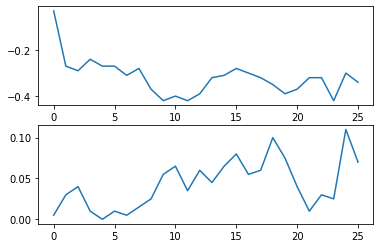

In [40]:
fig=plt.figure()
ax1=fig.add_subplot(2.7,1,1)
ax2=fig.add_subplot(2.7,1,2)
ax1.plot(e)
ax2.plot(abs(m))

In [45]:
#temporal behavior of the energy and the magnetization
e_m=[]
m_m=[]
for i in range(1,e.shape[-1]):
    e_m.append(np.mean(e[:i]))
    m_m.append((np.mean(m[:i])))
e_m=np.asarray(e_m)
m_m=np.asarray(m_m)

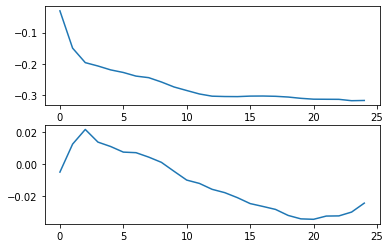

In [46]:
fig=plt.figure()
ax1=fig.add_subplot(2.7,1,1)
ax2=fig.add_subplot(2.7,1,2)
ax1.plot(e_m)
ax2.plot((m_m))

In [ ]:
Te=100
Tem=np.linspace(0.7,3.7,num=100,endpoint=True)
Tem=Tem.astype(float)
results=[]
for T in Tem:
    results.append(simu(T,Te,L=16))

In [514]:
results=np.asarray(results)

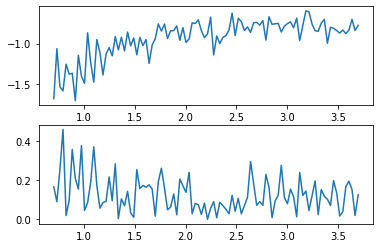

In [515]:
fig=plt.figure()
ax1=fig.add_subplot(2,1,1)
ax1.plot(Tem,results[:,0])
ax2=fig.add_subplot(2,1,2)
ax2.plot(Tem,abs(results[:,2]))

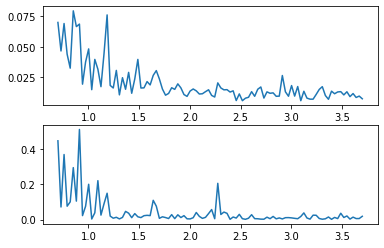

In [516]:
fig=plt.figure()
ax1=fig.add_subplot(2,1,1)
ax1.plot(Tem,results[:,1])
ax2=fig.add_subplot(2,1,2)
ax2.plot(Tem,results[:,3])

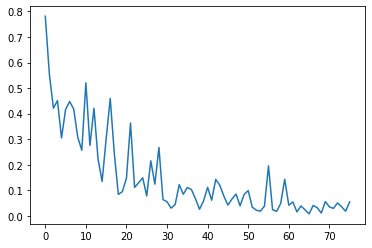

In [511]:
plt.plot(results[:,3])